# MNIST example using scivae

Here we just show a simple example of how the data we can encode & predict from the dataset.



In [1]:
import os
import shutil
import tempfile
import unittest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scivae import Optimiser, VAE, Validate
from sciviso import Scatterplot



# Set the location of the mnist data
data_dir = '../tests/data/mnist/'
image_size = 28
# The more images/data you have the better it will be
num_images = 40000

# Set up the data format (you don't normally need to do this (i.e. a normal np array works best))
test_f = open(f'{data_dir}train-images-idx3-ubyte', 'rb')
test_f.read(16)
buf = test_f.read(image_size * image_size * num_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images, image_size * image_size)

# Read in teh training labels
f = open(f'{data_dir}train-labels-idx1-ubyte', 'rb')
f.read(8)
test_labels = []
for i in range(0, len(test_data)):
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    test_labels.append(labels[0])




## Configuration

The configuration is the design of the neural network, it has the following parameters:  

1. loss: this is the metric for the loss function, and it can be: 'mse'=mean squared error (for continuous data), or 'ce' for cross entropy (for binary data)
2. distance_metric: this is the distance metric between the distributions and can either be 'mmd': maximum mean discrepency, or kl: Kullback–Leibler (see this blog for details: https://ermongroup.github.io/blog/a-tutorial-on-mmd-variational-autoencoders/)
3. mmd_weight: this is how much you want to force the VAE to learn 
config = {'loss': {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 1}, 
          'encoding': {'layers': [{'num_nodes': 128, 'activation_fn': 'selu'},
                                  {'num_nodes': 64, 'activation_fn': 'relu'}]}, 
          'decoding': {'layers': [{'num_nodes': 64, 'activation_fn': 'relu'}, 
                                  {'num_nodes': 128, 'activation_fn': 'selu'}]}, 
          'latent': {'num_nodes': 2}, 'optimiser': {'params': {}, 'name': 'adam'}}



In [2]:
# Create a configuration for the dataset
config = {'loss': {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 1}, 
          'encoding': {'layers': [{'num_nodes': 128, 'activation_fn': 'selu'},
                                  {'num_nodes': 64, 'activation_fn': 'relu'}]}, 
          'decoding': {'layers': [{'num_nodes': 64, 'activation_fn': 'relu'}, 
                                  {'num_nodes': 128, 'activation_fn': 'selu'}]}, 
          'latent': {'num_nodes': 2}, 'optimiser': {'params': {}, 'name': 'adam'}}



# Run the VAE 
vae = VAE(test_data, test_data, test_labels, config, 'vae')
# The more epochs you run the better (until some point so would recomend more though it wil take longer)
vae.encode('default', epochs=100, batch_size=1000)
# get the encoded data
encoding = vae.get_encoded_data()

None


2022-01-17 16:42:10.988910: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          100480      ['default_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 z_mean (Dense)                 (None, 2)            130         ['dense_1[0][0]']                
                                                                                            

34/34 [==============================] - 3s 52ms/step - loss: 64.4378 - val_loss: 50.0833
Epoch 2/100
34/34 [==============================] - 2s 44ms/step - loss: 46.8119 - val_loss: 44.5739
Epoch 3/100
34/34 [==============================] - 2s 45ms/step - loss: 43.6183 - val_loss: 43.0300
Epoch 4/100
34/34 [==============================] - 2s 50ms/step - loss: 42.5275 - val_loss: 42.2577
Epoch 5/100
34/34 [==============================] - 2s 51ms/step - loss: 41.7891 - val_loss: 41.5347
Epoch 6/100
34/34 [==============================] - 2s 53ms/step - loss: 41.0649 - val_loss: 40.8101
Epoch 7/100
34/34 [==============================] - 2s 53ms/step - loss: 40.2330 - val_loss: 40.0195
Epoch 8/100
34/34 [==============================] - 2s 54ms/step - loss: 39.4336 - val_loss: 39.3074
Epoch 9/100
34/34 [==============================] - 2s 52ms/step - loss: 38.7931 - val_loss: 38.7114
Epoch 10/100
34/34 [==============================] - 2s 53ms/step - loss: 38.2973 - val_loss:

34/34 [==============================] - 2s 54ms/step - loss: 32.0744 - val_loss: 33.1301
Epoch 81/100
34/34 [==============================] - 2s 55ms/step - loss: 32.0436 - val_loss: 33.1490
Epoch 82/100
34/34 [==============================] - 2s 53ms/step - loss: 32.0225 - val_loss: 33.0858
Epoch 83/100
34/34 [==============================] - 2s 59ms/step - loss: 31.9924 - val_loss: 33.0825
Epoch 84/100
34/34 [==============================] - 2s 57ms/step - loss: 31.9791 - val_loss: 33.0541
Epoch 85/100
34/34 [==============================] - 2s 60ms/step - loss: 31.9452 - val_loss: 33.0454
Epoch 86/100
34/34 [==============================] - 2s 60ms/step - loss: 31.9256 - val_loss: 33.0282
Epoch 87/100
34/34 [==============================] - 2s 61ms/step - loss: 31.9027 - val_loss: 33.0089
Epoch 88/100
34/34 [==============================] - 2s 59ms/step - loss: 31.8885 - val_loss: 33.0009
Epoch 89/100
34/34 [==============================] - 2s 59ms/step - loss: 31.8636 - v

In [3]:
encoding = vae.get_encoded_data()

## Visualise the reconstruction


Have a look at how good the reconstruction is from the latent space.

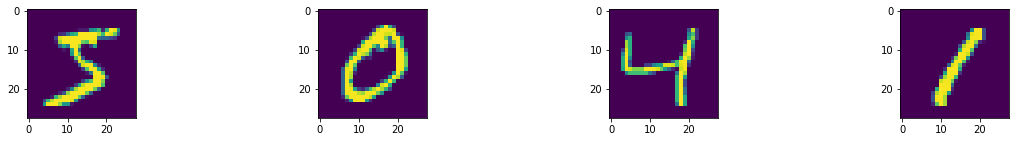

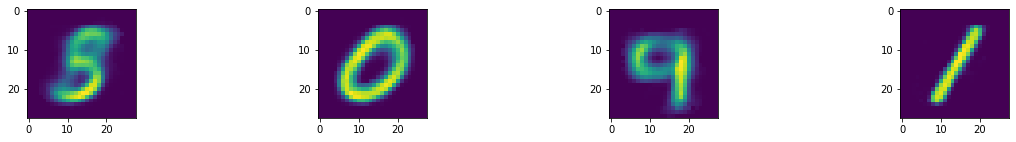

In [4]:
from sklearn.preprocessing import MinMaxScaler


# Show some of the images (4)
n = 4

# Show the true data
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))

plt.show()
# Ensure we're encoding and decoding the same dataset
scaler = MinMaxScaler(copy=True)
test_data_scaled = scaler.fit_transform(test_data)
# Show the prediction of the test data (i.e. using the test data how does it get reconstructed)

encoding = vae.encode_new_data(test_data_scaled)
# Show the prediction of the test data (i.e. using the test data how does it get reconstructed)
d = vae.decoder.predict(encoding)
plt.figure(figsize=(20, 2))
n = 4
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(d[i,:].reshape(28, 28))

plt.show()

## Visualise the latent space

Here we can have a look at the latent space by simply plotting the latent space & looking at how our labels separate.

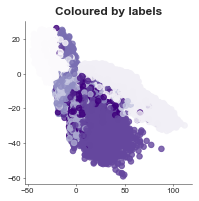

In [11]:
# Plot the latent space - have a look at the first two latent nodes
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
vis_df['test_label'] = test_labels


# Zip the colours to make the labels into numeric values
lut = dict(zip(set(test_labels), sns.color_palette("Set1", len(set(test_labels)))))
row_colors2 = pd.DataFrame(test_labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1',  
                      colour=vis_df['test_label'].values, title='Coloured by labels', 
                     add_legend=True)
scatter.plot()
plt.show()